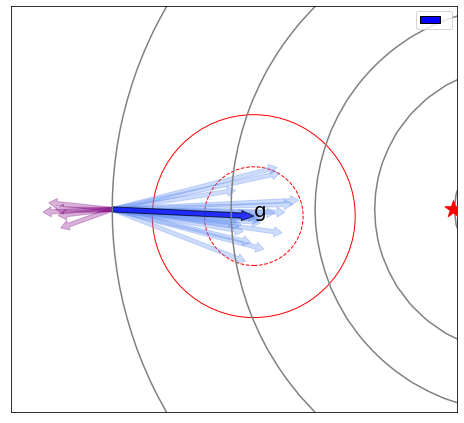

In [314]:
import matplotlib.patches as patches
from matplotlib.path import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.patches import FancyArrowPatch
from matplotlib.patches import Patch
import matplotlib.patches as mpatches

cmap = plt.cm.coolwarm
sd = 3

class AnnotationHandler(HandlerLine2D):
    def __init__(self,ms,*args,**kwargs):
        self.ms = ms
        HandlerLine2D.__init__(self,*args,**kwargs)
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize,
                       trans):
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent,
                                             width, height, fontsize)
        ydata = ((height - ydescent) / 2.) * np.ones(xdata.shape, float)
        legline = FancyArrowPatch(posA=(xdata[0],ydata[0]),
                                  posB=(xdata[-1],ydata[-1]),
                                  mutation_scale=self.ms,
                                  **orig_handle.arrowprops)
        legline.set_transform(trans)
        return legline,
    
def plot_contour(cur_point, benign, malicious, bound=True, xlim=(-1.5, 0.7), ylim=(0, 2), optim=(0.68, 1.0)):
    cir_center = np.mean(benign, axis=0)
    fig, ax = plt.subplots(figsize=(8, 8))
#     fig, ax = plt.subplots()
    nx = 101
    ny = 105
    xvec = np.linspace(-4, 4.0, nx)
    yvec = np.linspace(-4, 4.0, ny)

    x1, x2 = np.meshgrid(xvec, yvec)
    obj = x1**2 + x2**2 - 2*x1 - 2*x2 + 2
    ax.scatter(optim[0], optim[1], s=320, marker='*', color='red', zorder=3)
    cntr = ax.contour(x1, x2, obj, [0.01, 0.1, 0.5, 1, 2, 4, 8, 16], colors='gray')
    
    if bound:
        redius = max([np.linalg.norm(e - cir_center) for e in benign])
        cir1 = plt.Circle(cir_center, redius, color='red', fill=False, linestyle='--')
        ax.add_patch(cir1)
        
        cir1 = plt.Circle(cir_center, 0.5, color='red', fill=False)
        ax.add_patch(cir1)
    ax.annotate('g', (cir_center[0],cir_center[1]),fontsize=20)

    for d in benign:
        ax.arrow(x=cur_point[0], y=cur_point[1], dx=d[0] - cur_point[0], dy=d[1] - cur_point[1], 
                 width=0.02, color="#5D8BF4", alpha=0.3, 
                 head_width=0.05, head_length=0.04, overhang=0)
#         annotate = ax.annotate('', xy=cur_point, xytext=d, 
#                        arrowprops=dict(arrowstyle='->',color="crimson"), label="arrow")

    for d in malicious:
        ax.arrow(x=cur_point[0], y=cur_point[1], dx=d[0] - cur_point[0], dy=d[1] - cur_point[1], 
                 width=0.02, color="purple",  alpha=0.3,
                 head_width=0.05, head_length=0.04, overhang=0)

    true_mean = ax.arrow(x=cur_point[0], y=cur_point[1], dx=cir_center[0]  - cur_point[0], dy=cir_center[1] -  cur_point[1],
                 width=0.025, facecolor="blue",  alpha=0.7, length_includes_head=True, label='True Mean',
                 head_width=0.05, head_length=0.06, overhang=0)

    
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    
    legend_elements = [mpatches.FancyArrow(0, 0, 0, 0, fc='blue', width=1)]
    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().set_aspect('equal', adjustable='box')
    ax.legend(handles=legend_elements, loc='best')
    
cur_point = np.array([-1, 1])
np.random.seed(sd)
sz = 40
sample_sz = 30
mean = np.array((-0.3, 1))
cov = np.array([[0.01, 0], [0, 0.01]])
benign = np.random.multivariate_normal(mean, cov, 20)
cir_center = np.mean(benign, axis=0)
malicious = np.random.multivariate_normal((-1.2, 1), 0.2 * cov, 5)
plot_contour(cur_point, benign, malicious)

In [327]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase

list_color  = ["c", "gold", "crimson"]
list_mak    = ["d","s","o"]
list_lab    = ['Marker 1','Marker 2','Marker 3']

ax = plt.gca()

class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup, xdescent, ydescent,
                        width, height, fontsize,trans):
#         return [plt.Line2D([width/2], [height/2.],ls="",
#                        marker=tup[1],color=tup[0], transform=trans)]
         xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent,
                                                     width, height, fontsize)
                ydata = ((height - ydescent) / 2.) * np.ones(xdata.shape, float)
                legline = FancyArrowPatch(posA=(xdata[0],ydata[0]),
                                          posB=(xdata[-1],ydata[-1]),
                                          mutation_scale=self.ms,
                                          **orig_handle.arrowprops)
                legline.set_transform(trans)
    return [legline]


ax.legend(list(zip(list_color,list_mak)), list_lab, 
          handler_map={tuple:MarkerHandler()}) 

plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 23)

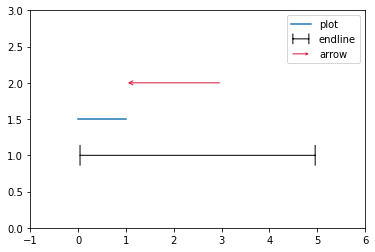

In [328]:
class AnnotationHandler(HandlerLine2D):
    def __init__(self,ms,*args,**kwargs):
        self.ms = ms
        HandlerLine2D.__init__(self,*args,**kwargs)
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize,
                       trans):
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent,
                                             width, height, fontsize)
        ydata = ((height - ydescent) / 2.) * np.ones(len(xdata), float)
        legline = FancyArrowPatch(posA=(xdata[0],ydata[0]),
                                  posB=(xdata[-1],ydata[-1]),
                                  mutation_scale=self.ms,
                                  **orig_handle.arrowprops)
        legline.set_transform(trans)
        return legline,



fig, ax = plt.subplots()
ax.axis([-1,6,0,3])
ax.plot([1.5,1.5], label="plot")
# create annotations in the axes
annotate = ax.annotate('', xy=(0, 1), xytext=(5, 1), 
                       arrowprops={'arrowstyle':'|-|'}, label="endline")
annotate2 = ax.annotate('', xy=(1, 2), xytext=(3, 2), 
                       arrowprops=dict(arrowstyle='->',color="crimson"), label="arrow")
# create legend for annotations
h, l = ax.get_legend_handles_labels()
ax.legend(handles = h +[annotate,annotate2], 
          handler_map={type(annotate) : AnnotationHandler(5)})

plt.show()

ValueError: Either posA and posB, or path need to provided

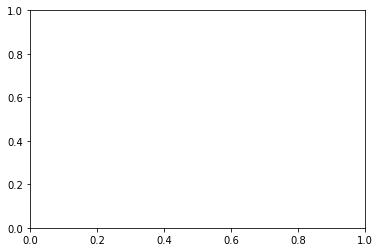

In [323]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
red_patch = mpatches.FancyArrowPatch(color='red', label='The red data')
ax.legend(handles=[red_patch])

plt.show()

In [321]:
l

['plot']

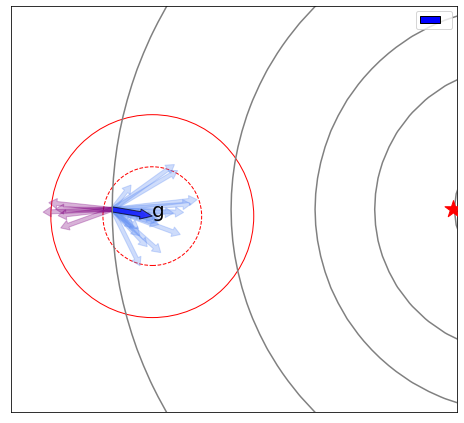

In [297]:
cir_center = (-0.8, 1)
cur_point = np.array([-1, 1])
np.random.seed(sd)
sz = 40
sample_sz = 30
mean = np.array(cir_center)
cov = np.array([[0.01, 0], [0, 0.01]])
benign = np.random.multivariate_normal(mean, cov, 20)

malicious = np.random.multivariate_normal((-1.2, 1), 0.2 * cov, 5)

plot_contour(cur_point, benign, malicious)

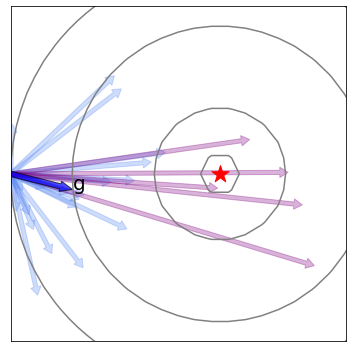

In [259]:
cir_center = (0.3, 1)
cur_point = np.array([-0., 1])
np.random.seed(sd)
sz = 40
sample_sz = 30
mean = np.array(cir_center)
cov = np.array([[0.05, 0], [0, 0.05]])
benign = np.random.multivariate_normal(mean, cov, 20)

malicious = np.random.multivariate_normal([1.5, 1], 1.2 * cov, 5)
plot_contour(cur_point, benign, malicious, bound=False, xlim=(-0, 1.6), ylim=(0.2, 1.8), optim=(1.0, 1.0))
# ax.set_xlim(-.2, 2.6)
# ax.set_ylim(-0., 2)

# plt.savefig("clipping.pdf", bbox_inches = "tight")

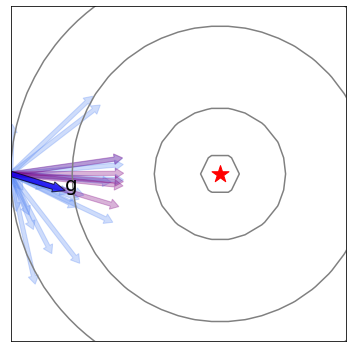

In [260]:
cir_center = (0.3, 1)
cur_point = np.array([-0., 1])


np.random.seed(sd)
sz = 40
sample_sz = 30
mean = np.array(cir_center)
cov = np.array([[0.05, 0], [0, 0.05]])
benign = np.random.multivariate_normal(mean, cov, 20)

malicious = np.random.multivariate_normal([1.5, 1], 1.2 * cov, 5)

tau = 0.5
for i in range(len(malicious)):
    l2_norm = np.sqrt(np.linalg.norm(malicious[i] - cur_point))
    l2_norm = np.linalg.norm(malicious[i] - cur_point)
#     print('malicious', l2_norm, tau)
    if l2_norm > tau:
        malicious[i] = (malicious[i] - cur_point) * tau / l2_norm + cur_point
        
for i in range(len(benign)):
    l2_norm = np.linalg.norm(benign[i] - cur_point)
#     print('benign', l2_norm, tau)
    if l2_norm > tau:
        benign[i] = (benign[i] - cur_point) * tau / l2_norm + cur_point

plot_contour(cur_point, benign, malicious, bound=False, xlim=(-0, 1.6), ylim=(0.2, 1.8), optim=(1.0, 1.0))